# **DATA VISUALIZATION**

In [1]:
from numpy import concatenate
from pandas import concat
from pandas import DataFrame
from pandas import read_csv
 
 
# Pustaka untuk visualisasi data
from matplotlib import pyplot
from matplotlib import pyplot as plt


In [2]:
dataset = read_csv("dk1_co.csv",index_col=0, engine='python')
dataset

,co_dki1,Tavg,RH_avg,ss,ff_avg
tanggal,,,,,
1/1/2017,25,29.9,70,5.0,2
1/2/2017,16,30.2,68,7.5,2
1/3/2017,17,29.9,71,8.2,2
1/4/2017,22,27.4,79,5.0,2
1/5/2017,25,28.0,81,4.6,1
...,...,...,...,...,...
3/27/2021,13,28.3,82,8.4,2
3/28/2021,15,28.8,79,2.3,1
3/29/2021,19,28.3,82,8.5,2


In [3]:
dataset.describe()

,co_dki1,Tavg,RH_avg,ss,ff_avg
count,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000
mean,17.956157,28.551966,75.649259,4.573501,1.439716
std,7.548083,0.982857,6.199126,2.448926,0.597907
min,3.000000,24.900000,54.000000,0.000000,0.000000
25%,14.000000,27.900000,71.000000,2.800000,1.000000
50%,18.000000,28.600000,76.000000,5.000000,1.000000
75%,22.000000,29.300000,80.000000,6.400000,2.000000
max,51.000000,31.200000,95.000000,9.800000,4.000000


In [4]:
values = dataset.values
dataset.head()

,co_dki1,Tavg,RH_avg,ss,ff_avg
tanggal,,,,,
1/1/2017,25,29.9,70,5.0,2
1/2/2017,16,30.2,68,7.5,2
1/3/2017,17,29.9,71,8.2,2
1/4/2017,22,27.4,79,5.0,2
1/5/2017,25,28.0,81,4.6,1


In [5]:
#correlation check
data_corr=dataset.corr()
data_corr

,co_dki1,Tavg,RH_avg,ss,ff_avg
co_dki1,1.000000,-0.178065,0.211179,-0.159522,-0.103370
Tavg,-0.178065,1.000000,-0.659687,0.411609,0.004785
RH_avg,0.211179,-0.659687,1.000000,-0.425948,-0.031469
ss,-0.159522,0.411609,-0.425948,1.000000,-0.026141
ff_avg,-0.103370,0.004785,-0.031469,-0.026141,1.000000


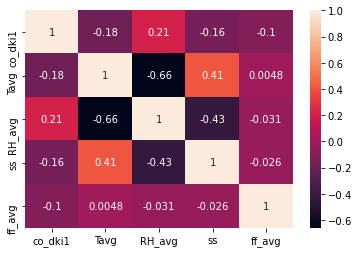

In [6]:
import seaborn as sns
import seaborn as sn
sn.heatmap(data_corr, annot=True)
plt.show()

In [7]:
# specify columns to plot
groups = [0,1,2,3,4]
i = 1

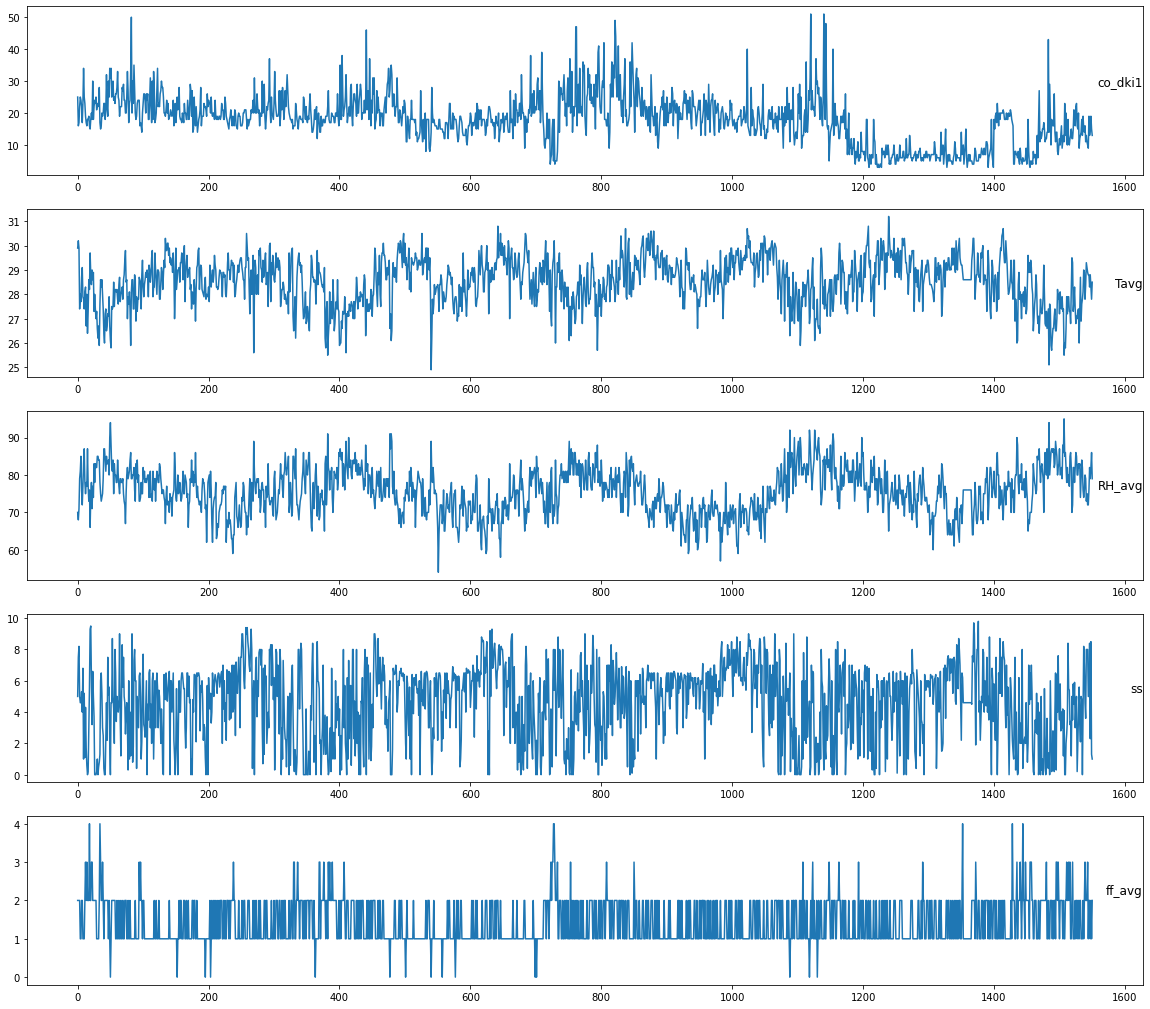

In [8]:
# plot each column
pyplot.figure(figsize=(20, 18))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

No handles with labels found to put in legend.


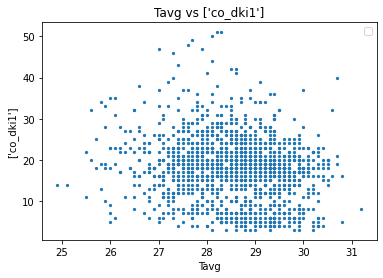

No handles with labels found to put in legend.


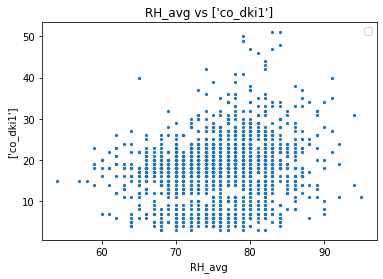

No handles with labels found to put in legend.


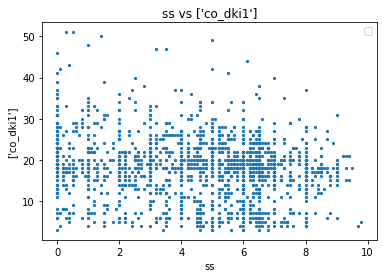

No handles with labels found to put in legend.


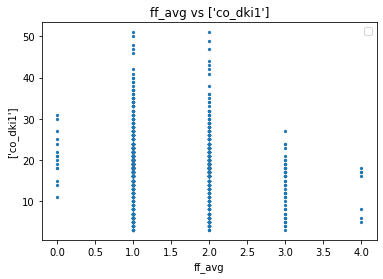

In [9]:
x_columns=["Tavg","RH_avg","ss","ff_avg"]
y_col=["co_dki1"]

for x_col in x_columns:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(dataset[x_col], dataset[y_col],s=5)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()

# **TIME SERIES ANALYSIS**

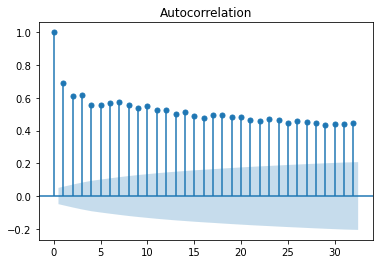

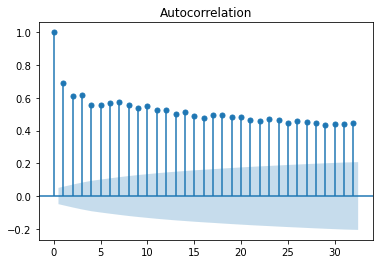

In [10]:
#Autocorellation Test
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
target=dataset["co_dki1"]
plot_acf(target)

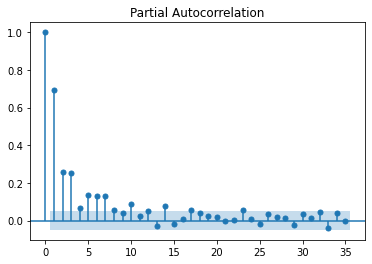

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(target, lags=35)
pyplot.show()

In [12]:
#ADF test
from statsmodels.tsa.stattools import adfuller
target = target.values
result = adfuller(target, autolag='t-stat')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.906028
p-value: 0.044651
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


# **DATA PREPROCESSING**

In [13]:
# Pustaka untuk membuat data latih dan data uji.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [14]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    # return value
    return agg

In [15]:
values = dataset.values

In [16]:
dataset.head()

,co_dki1,Tavg,RH_avg,ss,ff_avg
tanggal,,,,,
1/1/2017,25,29.9,70,5.0,2
1/2/2017,16,30.2,68,7.5,2
1/3/2017,17,29.9,71,8.2,2
1/4/2017,22,27.4,79,5.0,2
1/5/2017,25,28.0,81,4.6,1


In [17]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1551 entries, 1/1/2017 to 3/31/2021
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   co_dki1  1551 non-null   int64  
 1   Tavg     1551 non-null   float64
 2   RH_avg   1551 non-null   int64  
 3   ss       1551 non-null   float64
 4   ff_avg   1551 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 105.0+ KB
None


In [18]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [19]:
scaled

array([[0.45833333, 0.79365079, 0.3902439 , 0.51020408, 0.5       ],
       [0.27083333, 0.84126984, 0.34146341, 0.76530612, 0.5       ],
       [0.29166667, 0.79365079, 0.41463415, 0.83673469, 0.5       ],
       ...,
       [0.33333333, 0.53968254, 0.68292683, 0.86734694, 0.5       ],
       [0.25      , 0.46031746, 0.7804878 , 0.13265306, 0.25      ],
       [0.20833333, 0.57142857, 0.6097561 , 0.10204082, 0.5       ]])

In [20]:
import pandas as pd
normalisasi= pd.DataFrame(scaled)

In [21]:
normalisasi.head(10)

,0,1,2,3,4
0,0.458333,0.793651,0.390244,0.510204,0.50
1,0.270833,0.841270,0.341463,0.765306,0.50
2,0.291667,0.793651,0.414634,0.836735,0.50
3,0.395833,0.396825,0.609756,0.510204,0.50
4,0.458333,0.492063,0.658537,0.469388,0.25
5,0.437500,0.444444,0.756098,0.469388,0.25
6,0.395833,0.603175,0.536585,0.540816,0.50
7,0.291667,0.666667,0.439024,0.408163,0.50
8,0.416667,0.476190,0.560976,0.693878,0.25
9,0.645833,0.460317,0.707317,0.102041,0.25


In [22]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [23]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.458333,0.793651,0.390244,0.510204,0.50,0.270833,0.841270,0.341463,0.765306,0.50
2,0.270833,0.841270,0.341463,0.765306,0.50,0.291667,0.793651,0.414634,0.836735,0.50
3,0.291667,0.793651,0.414634,0.836735,0.50,0.395833,0.396825,0.609756,0.510204,0.50
4,0.395833,0.396825,0.609756,0.510204,0.50,0.458333,0.492063,0.658537,0.469388,0.25
5,0.458333,0.492063,0.658537,0.469388,0.25,0.437500,0.444444,0.756098,0.469388,0.25
...,...,...,...,...,...,...,...,...,...,...
1546,0.333333,0.619048,0.536585,0.510204,0.50,0.208333,0.539683,0.682927,0.857143,0.50
1547,0.208333,0.539683,0.682927,0.857143,0.50,0.250000,0.619048,0.609756,0.234694,0.25
1548,0.250000,0.619048,0.609756,0.234694,0.25,0.333333,0.539683,0.682927,0.867347,0.50
1549,0.333333,0.539683,0.682927,0.867347,0.50,0.250000,0.460317,0.780488,0.132653,0.25


In [24]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)

In [25]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
1,0.458333,0.793651,0.390244,0.510204,0.50,0.270833
2,0.270833,0.841270,0.341463,0.765306,0.50,0.291667
3,0.291667,0.793651,0.414634,0.836735,0.50,0.395833
4,0.395833,0.396825,0.609756,0.510204,0.50,0.458333
5,0.458333,0.492063,0.658537,0.469388,0.25,0.437500
...,...,...,...,...,...,...
1546,0.333333,0.619048,0.536585,0.510204,0.50,0.208333
1547,0.208333,0.539683,0.682927,0.857143,0.50,0.250000
1548,0.250000,0.619048,0.609756,0.234694,0.25,0.333333
1549,0.333333,0.539683,0.682927,0.867347,0.50,0.250000


In [26]:
values = reframed.values

In [27]:
# split into train and test sets
train_size = int(len(values) * 0.8)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(values),:]

In [28]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [29]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [30]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1240, 1, 5) (1240,) (310, 1, 5) (310,)


# LSTM Modelling

In [31]:
# LSTM-LIBRARY
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Pustaka untuk  evaluasi model prediksi
from math import sqrt
from sklearn.metrics import mean_squared_error

In [32]:
import numpy as np
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

# **Grid Search Hyperparameter Tuning**

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [34]:
def build_regressor(neurons=1,dropout_rate=0.01,
                   learn_rate=0.01, decays=0.01):
    grid_model = Sequential()
    grid_model.add(LSTM(units=neurons, activation='tanh',input_shape=(train_X.shape[1], train_X.shape[2])))
    grid_model.add(Dropout(dropout_rate))
    grid_model.add(Dense(1))
    
    #compile model
    optimizer=Adam(lr=learn_rate, decay=decays)
    grid_model.compile(loss='mae',  optimizer=optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_regressor, epochs=500, 
                            batch_size=32, verbose=0)
parameters = {'neurons' : [40,20,28],
              'learn_rate' : [0.001,0.0001,0.01],
              'decays':[0.001,0.0001,0.01],
              'dropout_rate':[0.05,0.01]}

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters)

In [35]:
tes = grid_search.fit(train_X, train_y,
                      validation_data=(test_X, test_y))

In [36]:
# summarize results
print("Best parameters: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best parameters: -0.012173 using {'decays': 0.001, 'dropout_rate': 0.01, 'learn_rate': 0.01, 'neurons': 40}

-0.013202 (0.005719) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.001, 'neurons': 40}
-0.013185 (0.005659) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.001, 'neurons': 20}
-0.013175 (0.005640) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.001, 'neurons': 28}
-0.014040 (0.007042) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.0001, 'neurons': 40}
-0.014394 (0.007151) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.0001, 'neurons': 20}
-0.014762 (0.007966) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.0001, 'neurons': 28}
-0.012306 (0.005050) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.01, 'neurons': 40}
-0.012415 (0.005187) with: {'decays': 0.001, 'dropout_rate': 0.05, 'learn_rate': 0.01, 'neurons': 20}
-0.012419 (0.005143) with: {'decays': 0.001, 'dropout_rate': 0.05,

# Modelling LSTM

In [37]:
from keras import optimizers
# design network
my_model = Sequential()
my_model.add(LSTM(40, activation = 'tanh',input_shape=(train_X.shape[1], train_X.shape[2])))
my_model.add(Dropout(0.01))
my_model.add(Dense(1))

sgd = optimizers.Adam(lr=0.01,decay=0.001)
my_model.compile(loss='mae', optimizer='sgd')

In [38]:
# fit network
history = my_model.fit(train_X, train_y, epochs=500, batch_size=32, 
                       validation_data=(test_X, test_y), 
                       verbose=2, shuffle=False)

Epoch 1/500
310/310 - 1s - loss: 0.0310 - val_loss: 0.0328
Epoch 2/500
310/310 - 0s - loss: 0.0209 - val_loss: 0.0320
Epoch 3/500
310/310 - 0s - loss: 0.0204 - val_loss: 0.0313
Epoch 4/500
310/310 - 0s - loss: 0.0199 - val_loss: 0.0306
Epoch 5/500
310/310 - 0s - loss: 0.0196 - val_loss: 0.0301
Epoch 6/500
310/310 - 0s - loss: 0.0192 - val_loss: 0.0295
Epoch 7/500
310/310 - 0s - loss: 0.0189 - val_loss: 0.0289
Epoch 8/500
310/310 - 0s - loss: 0.0185 - val_loss: 0.0284
Epoch 9/500
310/310 - 0s - loss: 0.0183 - val_loss: 0.0279
Epoch 10/500
310/310 - 0s - loss: 0.0180 - val_loss: 0.0273
Epoch 11/500
310/310 - 0s - loss: 0.0178 - val_loss: 0.0268
Epoch 12/500
310/310 - 0s - loss: 0.0176 - val_loss: 0.0265
Epoch 13/500
310/310 - 0s - loss: 0.0173 - val_loss: 0.0260
Epoch 14/500
310/310 - 0s - loss: 0.0170 - val_loss: 0.0256
Epoch 15/500
310/310 - 0s - loss: 0.0168 - val_loss: 0.0252
Epoch 16/500
310/310 - 0s - loss: 0.0166 - val_loss: 0.0248
Epoch 17/500
310/310 - 0s - loss: 0.0165 - val_lo

310/310 - 0s - loss: 0.0120 - val_loss: 0.0107
Epoch 138/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0108
Epoch 139/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0107
Epoch 140/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0107
Epoch 141/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0107
Epoch 142/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0107
Epoch 143/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0106
Epoch 144/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0107
Epoch 145/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0107
Epoch 146/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0106
Epoch 147/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0106
Epoch 148/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0106
Epoch 149/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0106
Epoch 150/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0106
Epoch 151/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0105
Epoch 152/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0106
Epoch 153/500
310/310 - 0s - loss: 0.0

Epoch 272/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 273/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0102
Epoch 274/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 275/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0102
Epoch 276/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 277/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0102
Epoch 278/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 279/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 280/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0102
Epoch 281/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0102
Epoch 282/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 283/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0102
Epoch 284/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0102
Epoch 285/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0102
Epoch 286/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 287/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 288/500
310/310 - 

Epoch 407/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 408/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 409/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 410/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 411/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 412/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 413/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 414/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 415/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 416/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 417/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 418/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 419/500
310/310 - 0s - loss: 0.0118 - val_loss: 0.0101
Epoch 420/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0100
Epoch 421/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 422/500
310/310 - 0s - loss: 0.0119 - val_loss: 0.0101
Epoch 423/500
310/310 - 

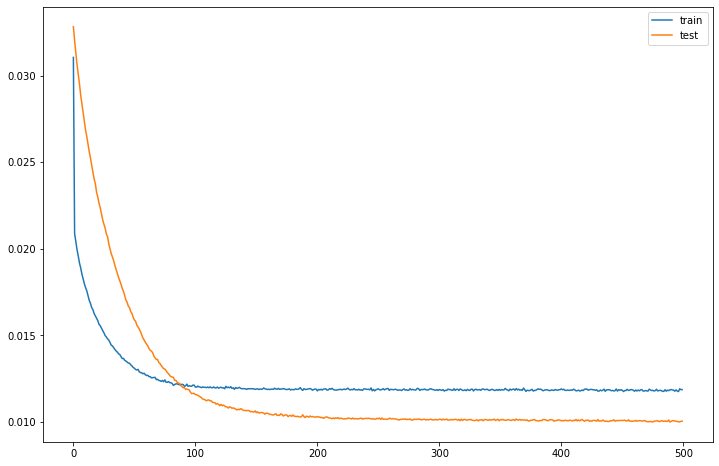

In [39]:
# plot history
pyplot.figure(figsize=(12, 8))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [40]:
# make a prediction
yhat = my_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [41]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [42]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [43]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 4.810


In [44]:
import numpy as np

def mape(inv_y,inv_yhat):
    return np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100



#Calculate the MAPE
result = mape(inv_y,inv_yhat)

#print the result

print("The mean absolute percentage error: ",result)

The mean absolute percentage error:  55.126111535512834


In [45]:
import numpy as np
prediksi=np.stack((inv_y,inv_yhat),axis=1)

In [46]:
import pandas as pd
hasil = pd.DataFrame(prediksi)

In [47]:
hasil.head(5)

,0,1
0,5.0,7.831066
1,4.0,7.746678
2,6.0,8.819367
3,6.0,9.518377
4,7.0,9.738670


In [48]:
hasil_corr=hasil.corr()
hasil_corr

,0,1
0,1.000000,0.695127
1,0.695127,1.000000


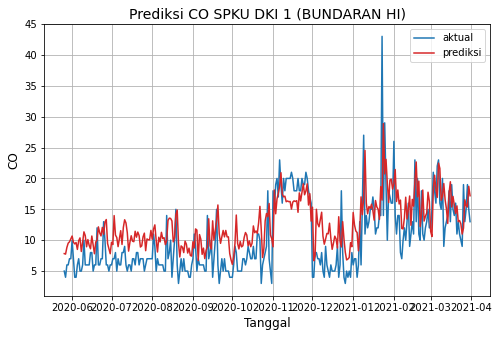

In [49]:
import pandas as pd
import pandas as pd
# generate urutan data sesuai panjang datanya
x = pd.date_range(start="2020-5-26", end="2021-3-31")

# membuat frame
fig, ax = plt.subplots(figsize = (8,5))

# membuat time series plot
ax.plot(x, inv_y, color="tab:blue", label="aktual", linewidth=1.5)
ax.plot(x, inv_yhat, color="tab:red", label="prediksi", linewidth=1.5)

# membuat label-label
ax.set_title("Prediksi CO SPKU DKI 1 (BUNDARAN HI)", fontsize=14)
ax.set_xlabel("Tanggal", fontsize=12)
ax.set_ylabel("CO", fontsize=12)
ax.legend(loc='upper right')
ax.grid(True)

# menampilkan plot
plt.show()